In [1]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Cat's data frame
df10 = pd.read_pickle('cats_bomojo_data.pkl')
df10 = df10.rename(columns={'Distributer':'Distributor'})

In [3]:
# Split Genre column from string to list
temp = [x.split(',') for x in df10['Genres']] # Temp list for list of genres
for i in range(len(df10.index)): # maps list back into dataframe
    df10.at[i, 'Genres'] = temp[i]
df10.head(3)

,Rank,Title,Lifetime Gross,Year,URL,Distributor,Budget,Rating,Running_Time_hrs,Genres
0,1,Star Wars: Episode VII - The Force Awakens,936662225,2015,https://www.boxofficemojo.com/title/tt2488496/...,Walt Disney Studios Motion Pictures,245000000,PG-13,2.3,"[Action, Adventure, Sci-Fi]"
1,2,Avengers: Endgame,858373000,2019,https://www.boxofficemojo.com/title/tt4154796/...,Walt Disney Studios Motion Pictures,356000000,PG-13,3.02,"[Action, Adventure, Drama, Sci-Fi]"
2,3,Avatar,760507625,2009,https://www.boxofficemojo.com/title/tt0499549/...,Twentieth Century Fox,237000000,PG-13,2.7,"[Action, Adventure, Fantasy, Sci-Fi]"


In [4]:
# create dictionary of genre and counts of each genre for each distributor
genre_counts = {}
for i in range(len(df10.index)):
    distributor = df10['Distributor'][i]
    for genre in df10['Genres'][i]:
        if distributor not in genre_counts.keys():
            genre_counts[distributor] = {genre : 1}
        if genre not in genre_counts[distributor].keys():
            genre_counts[distributor][genre] = 1
        else:
            genre_counts[distributor][genre] += 1
            
genre_counts['Twentieth Century Fox']

{'Action': 62,
 'Adventure': 73,
 'Fantasy': 36,
 'Sci-Fi': 44,
 'Comedy': 59,
 'Family': 39,
 'Thriller': 38,
 'Drama': 31,
 'Romance': 11,
 'Animation': 25,
 'Music': 5,
 'Biography': 7,
 'Crime': 14,
 'History': 3,
 'Western': 2,
 'Musical': 7,
 'Mystery': 7,
 'Sport': 3,
 'War': 2,
 'Horror': 2}

In [5]:
# Load Dave's data frame and limit to top 10 distributers
df_top10_dists = pd.read_pickle('daves_data.pkl')[:10]
df_top10_dists

,Distributor,Number of Movies,Box Office Total,Ticket Sales,Market Share
0,Walt Disney,572,"$39,690,084,736","5,668,202,394",16.94%
1,Warner Bros.,803,"$35,635,746,799","5,132,722,643",15.21%
2,Sony Pictures,729,"$28,774,871,087","4,257,883,833",12.28%
3,Universal,511,"$27,464,279,056","3,938,555,708",11.72%
4,20th Century Fox,520,"$25,854,596,898","3,792,345,700",11.03%
5,Paramount Pictures,482,"$24,235,897,162","3,647,671,396",10.34%
6,Lionsgate,416,"$9,538,424,750","1,211,612,233",4.07%
7,New Line,207,"$6,194,343,024","1,116,305,898",2.64%
8,Dreamworks SKG,77,"$4,278,649,271","760,431,349",1.83%
9,Miramax,384,"$3,835,978,908","714,099,626",1.64%


In [6]:
# convert dictionary to Data Frame
df_counts = pd.DataFrame.from_dict(genre_counts, orient='columns')
df_counts = df_counts.replace(np.nan, 0).astype(int)
df_counts.reset_index(inplace=True)

# rename columsn to match Dave's data
df_counts = df_counts.rename(columns={'index':'Genre',
                   'Walt Disney Studios Motion Pictures':'Walt Disney', 
                   'Twentieth Century Fox':'20th Century Fox',
                    'Sony Pictures Entertainment (SPE)':'Sony Pictures',
                   'Universal Pictures':'Universal',
                   'New Line Cinema':'New Line',
                   'DreamWorks':'Dreamworks SKG'
                  })
df_counts.head(2)

,Genre,Walt Disney,20th Century Fox,Paramount Pictures,Universal,Warner Bros.,DreamWorks Distribution,Lionsgate,Sony Pictures,Dreamworks SKG,...,AVCO Embassy Pictures,RKO Radio Pictures,United Artists Releasing,FilmDistrict,Focus Features,IMAX,MacGillivray Freeman Films,American International Pictures (AIP),Relativity Media,Roadside Attractions
0,Action,54,62,55,45,80,1,12,49,12,...,0,0,0,2,0,0,0,0,2,0
1,Adventure,107,73,48,40,68,9,10,39,15,...,0,0,0,0,0,0,0,0,0,0


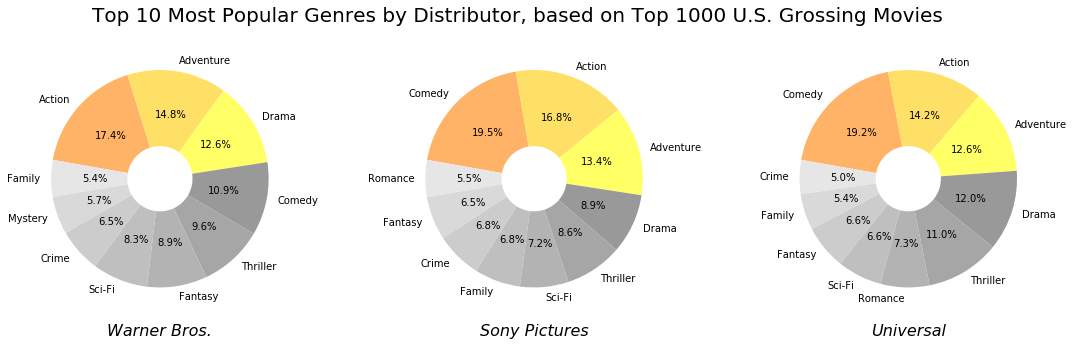

In [7]:
# Create subplots of top Genres for each distributer
count = 10 # No. of genres to display
no_dists = 3 # No. of distributers to display
x=0 #initialize counter

fig, axs = plt.subplots(1, no_dists, figsize=(19,5)) # initialize subplot

# loop through top 3 distributers to create plot for each
for dist in df_top10_dists['Distributor'][1:no_dists+1]: # start at 2nd distributer to eliminate Disney
    top_genres = df_counts.sort_values(by=dist,ascending=False).Genre[:count] # create dataframe of top genres per distributer
    counts = df_counts.sort_values(by=dist,ascending=False)[dist][:count] # create dataframe with values for each distributer 
    colors = ['#ffb366', '#ffe066', '#ffff66', 
              '#999999','#a6a6a6','#b3b3b3','#bfbfbf','#cccccc','#d9d9d9','#e6e6e6']
    
    # create pie subplot for current distributer
    axs[x].pie(counts, labels=top_genres, 
               counterclock=False, startangle=-190, colors=colors, 
               autopct='%.1f%%', wedgeprops=dict(width=.7)) 
    axs[x].set_title(dist, fontsize=16, y=-0.1, style='italic')
    x+=1
    
plt.suptitle('Top 10 Most Popular Genres by Distributor, based on Top 1000 U.S. Grossing Movies', fontsize=20)
plt.savefig('genres_by_distributer.png', dpi=300) # save plot to file for use in presentation

In [8]:
# create dictionary of ratings and counts of each rating for each distributor
rating_counts = {}
i=0  

# loop through Rating column and count occurences 
for rating in df10['Rating']:
    distributor = df10['Distributor'][i]
    if rating=='No Data' or rating=='Approved': # skip no data or outdated rating
        continue
    if distributor not in rating_counts.keys():
        rating_counts[distributor] = {rating : 1}
    if rating not in rating_counts[distributor].keys():
        rating_counts[distributor][rating] = 1
    else:
        rating_counts[distributor][rating] += 1
    i+=1

# Construct and clean dataframe of rating counts
df_rating_counts = pd.DataFrame(rating_counts).transpose().replace(np.nan, 0).astype(int)
df_rating_counts.reset_index(inplace=True)
df_rating_counts = df_rating_counts.rename(columns={'index':'Distributor'})
df_rating_counts = df_rating_counts.replace({'Walt Disney Studios Motion Pictures':'Walt Disney', 
                   'Twentieth Century Fox':'20th Century Fox',
                    'Sony Pictures Entertainment (SPE)':'Sony Pictures',
                   'Universal Pictures':'Universal',
                   'New Line Cinema':'New Line',
                   'DreamWorks':'Dreamworks SKG'})

# Join ratings dataframe with top 10 distributers and reorder ratings columns
df_top10_dists_w_ratings = df_top10_dists.set_index('Distributor').join(df_rating_counts.set_index('Distributor'))
df_top10_dists_w_ratings = pd.concat([df_top10_dists_w_ratings.iloc[:, 0:4],
                                  df_top10_dists_w_ratings['R'],
                                  df_top10_dists_w_ratings['PG-13'],
                                  df_top10_dists_w_ratings['PG'],
                                  df_top10_dists_w_ratings['G']], axis=1, join='inner')
df_top10_dists_w_ratings.head(5)

,Number of Movies,Box Office Total,Ticket Sales,Market Share,R,PG-13,PG,G
Distributor,,,,,,,,
Walt Disney,572,"$39,690,084,736","5,668,202,394",16.94%,35,77,32,7
Warner Bros.,803,"$35,635,746,799","5,132,722,643",15.21%,37,71,37,5
Sony Pictures,729,"$28,774,871,087","4,257,883,833",12.28%,25,37,27,0
Universal,511,"$27,464,279,056","3,938,555,708",11.72%,30,56,29,3
20th Century Fox,520,"$25,854,596,898","3,792,345,700",11.03%,26,54,25,2


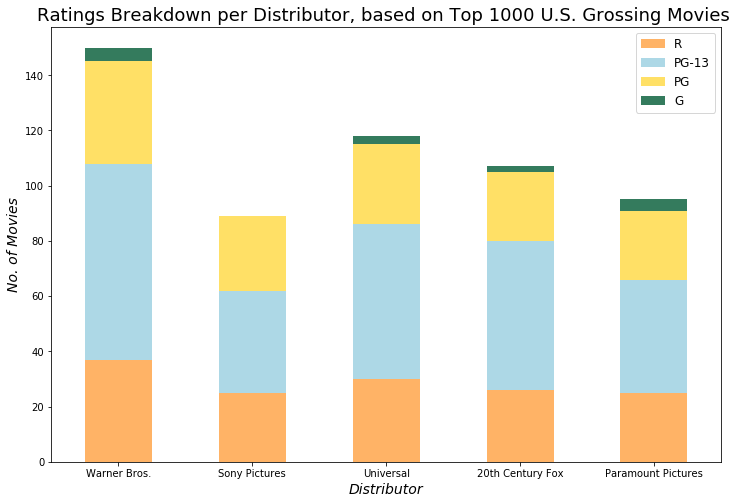

In [9]:
limit = 5 # no of distributers to display
colors = ['#ffb366', 'lightblue', '#ffe066', '#347B5D']

# create stacked bar graph
ax2 = df_top10_dists_w_ratings[1:limit+1].plot.bar(
                                          y=df_top10_dists_w_ratings.columns, 
                                          stacked=True, color=colors, rot=0,
                                          figsize=(12,8)) 
plt.legend(bbox_to_anchor=(1, 1), fontsize=12)   

ax2.set_xlabel('Distributor', fontsize=14, style='italic')
ax2.set_ylabel('No. of Movies', fontsize=14, style='italic')
ax2.set_title('Ratings Breakdown per Distributor, based on Top 1000 U.S. Grossing Movies ', fontsize=18)

plt.savefig('ratings_by_distributer.png', dpi=300) # save plot to file for use in presentation